In [1]:
!pip install geopy
!pip install plotly

In [2]:
!pip install --upgrade threadpoolctl
!pip install --upgrade scikit-learn

In [4]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [5]:
from geopy.geocoders import Nominatim
import time

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [7]:
#loading excel file
df= pd.read_excel(r"C:\Users\coolt\Downloads\XYZ Company.xlsx", header=1)

In [8]:
df.head(5)

,Unnamed: 0,TripID,ShipperID,CategoryID,Customer,ShipDate,OriginCity,OriginState,ShipDays,DestinationCity,DestinationState,DeliveryDate,Total Miles,Shipping Cost,Revenue
0,NaN,10001,1,5,Reddoit,2016-07-08,Bangalore,MI,3,Vijaywada,OH,2016-07-11,955,2232,2910
1,NaN,10002,2,7,Plustax,2016-05-21,Kolkata,WI,2,Bhatinda,IL,2016-05-23,317,646,1199
2,NaN,10003,1,5,bamity,2016-08-29,Bhatinda,IL,1,Jaipur,IL,2016-08-30,1026,97,645
3,NaN,10004,1,4,Quotelane,2016-08-25,Pune,IL,4,Guwahati,IL,2016-08-29,536,7276,5778
4,NaN,10005,1,5,Viatom,2016-05-20,Hyderabad,IN,1,Raipur,IL,2016-05-21,450,6807,7571


In [9]:
df= df.drop(columns=["Unnamed: 0"])

In [10]:
df.head(5)

,TripID,ShipperID,CategoryID,Customer,ShipDate,OriginCity,OriginState,ShipDays,DestinationCity,DestinationState,DeliveryDate,Total Miles,Shipping Cost,Revenue
0,10001,1,5,Reddoit,2016-07-08,Bangalore,MI,3,Vijaywada,OH,2016-07-11,955,2232,2910
1,10002,2,7,Plustax,2016-05-21,Kolkata,WI,2,Bhatinda,IL,2016-05-23,317,646,1199
2,10003,1,5,bamity,2016-08-29,Bhatinda,IL,1,Jaipur,IL,2016-08-30,1026,97,645
3,10004,1,4,Quotelane,2016-08-25,Pune,IL,4,Guwahati,IL,2016-08-29,536,7276,5778
4,10005,1,5,Viatom,2016-05-20,Hyderabad,IN,1,Raipur,IL,2016-05-21,450,6807,7571


In [11]:
distinct_cities= df["OriginCity"].unique()

In [13]:
Distinct_State =  df["DestinationState"].unique()
Distinct_State

array(['OH', 'IL', 'IN', 'WI', 'MI', 'IA'], dtype=object)

In [10]:
distinct_cities

array(['Bangalore', 'Kolkata', 'Bhatinda', 'Pune', 'Hyderabad', 'Raipur',
       'Daman', 'Kochi', 'Vizag', 'Patna', 'Mohali', 'Chennai',
       'Bhubaneswar', 'Guwahati', 'Mumbai', 'Indore', 'Lucknow',
       'Vijaywada', 'Zirakpur', 'Ahmedabad', 'Nagpur', 'Jaipur', 'Jammu'],
      dtype=object)

In [15]:
City_summary= df.groupby("OriginCity",).agg(
                Shipments=("OriginCity" , "count") ,
                total_miles=("Total Miles","sum"),
                total_cost=("Shipping Cost" , "sum"),
                total_rev=("Revenue" , "sum")
).reset_index()

In [16]:
City_summary

,OriginCity,Shipments,total_miles,total_cost,total_rev
0,Ahmedabad,83,53417,355599,396535
1,Bangalore,84,56237,280563,344083
2,Bhatinda,84,56916,291353,350180
3,Bhubaneswar,83,56862,327284,340270
4,Chennai,83,59929,325431,389288
5,Daman,84,58611,324608,343544
6,Guwahati,83,60517,317845,338069
7,Hyderabad,84,63414,341289,365135
8,Indore,83,58991,332829,371881
9,Jaipur,166,118682,680913,739000


In [17]:
City_summary1= df.groupby("OriginCity").agg(
                Shipments=("OriginCity" , "count") ,
                total_miles=("Total Miles","sum"),
                total_cost=("Shipping Cost" , "sum"),
                total_rev=("Revenue" , "sum")
)

In [18]:
City_summary1

,Shipments,total_miles,total_cost,total_rev
OriginCity,,,,
Ahmedabad,83,53417,355599,396535
Bangalore,84,56237,280563,344083
Bhatinda,84,56916,291353,350180
Bhubaneswar,83,56862,327284,340270
Chennai,83,59929,325431,389288
Daman,84,58611,324608,343544
Guwahati,83,60517,317845,338069
Hyderabad,84,63414,341289,365135
Indore,83,58991,332829,371881


In [19]:
City_summary["Shipments"].max()

166

In [20]:
City_summary["total_miles"].max()

118682

In [ ]:
City_summary["TotalRevenue"].max()

In [ ]:
plt.bar(City_summary["OriginCity"],City_summary["Shipments"])
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.bar(City_summary["OriginCity"],City_summary["total_rev"])
plt.xticks(rotation=90)
plt.show()

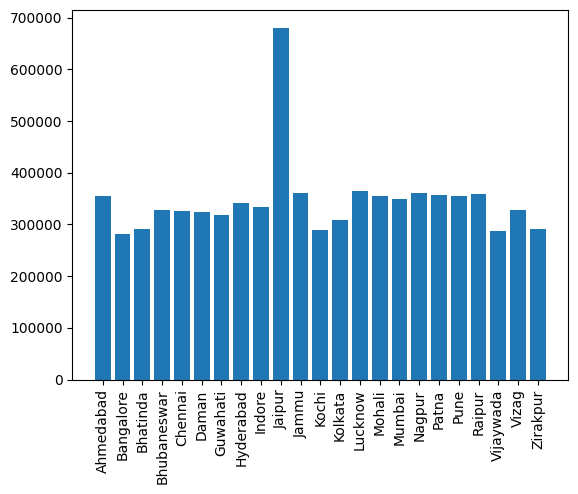

In [22]:
plt.bar(City_summary["OriginCity"],City_summary["total_cost"])
plt.xticks(rotation=90)
plt.show()

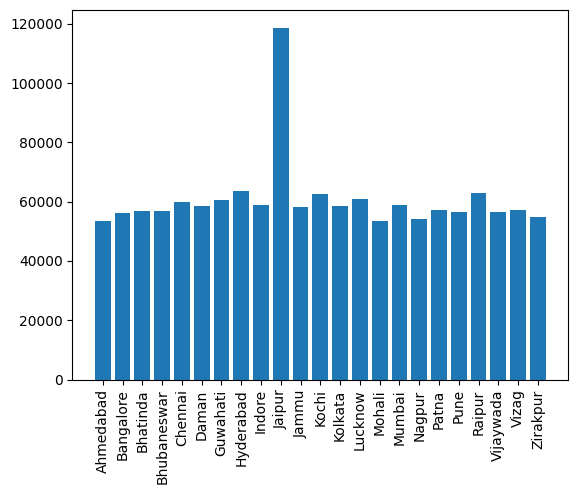

In [23]:
plt.bar(City_summary["OriginCity"],City_summary["total_miles"])
plt.xticks(rotation=90)
plt.show()

In [24]:
City_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   OriginCity   23 non-null     object
 1   Shipments    23 non-null     int64 
 2   total_miles  23 non-null     int64 
 3   total_cost   23 non-null     int64 
 4   total_rev    23 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.0+ KB


In [25]:
City_summary.describe()

,Shipments,total_miles,total_cost,total_rev
count,23.000000,23.000000,23.000000,23.000000
mean,86.956522,60653.782609,345358.956522,380001.521739
std,17.237586,12951.492160,78151.994671,81814.528106
min,83.000000,53417.000000,280563.000000,315723.000000
25%,83.000000,56468.000000,313296.000000,343813.500000
50%,83.000000,58134.000000,332829.000000,365135.000000
75%,84.000000,60223.000000,355821.000000,387540.500000
max,166.000000,118682.000000,680913.000000,739000.000000


In [26]:
state_summary= df.groupby("OriginState").agg(
                Shipments=("OriginState" , "count") ,
                total_miles=("Total Miles","sum"),
                total_cost=("Shipping Cost" , "sum"),
                total_rev1=("Revenue", "sum")
)

In [27]:
state_summary

,Shipments,total_miles,total_cost,total_rev1
OriginState,,,,
IA,83,61216,334315,349691
IL,667,462690,2685375,2906351
IN,251,182955,986672,1065483
MI,417,281280,1612251,1786832
OH,249,176202,985670,1105079
WI,333,230694,1338973,1526599


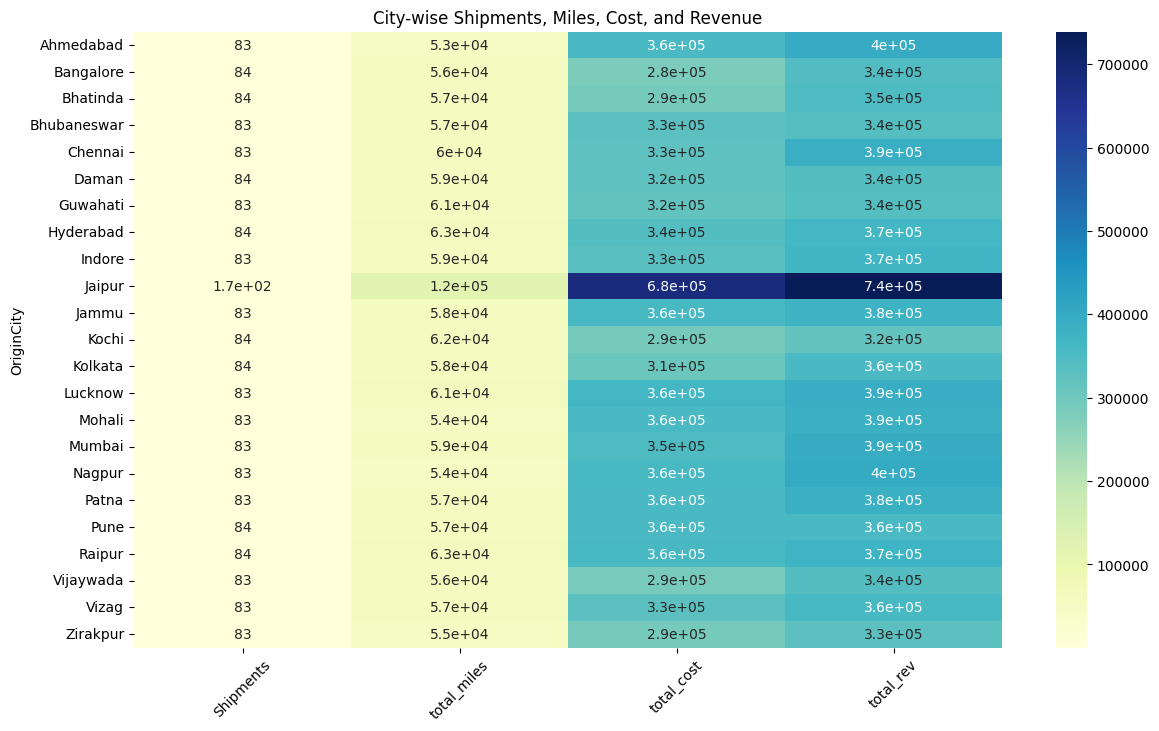

In [30]:
# Heatmap of where orders are getting dispatched
plt.figure(figsize=(14,8))
sns.heatmap(City_summary1, annot=True, cmap="YlGnBu")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.title("City-wise Shipments, Miles, Cost, and Revenue")
plt.show()


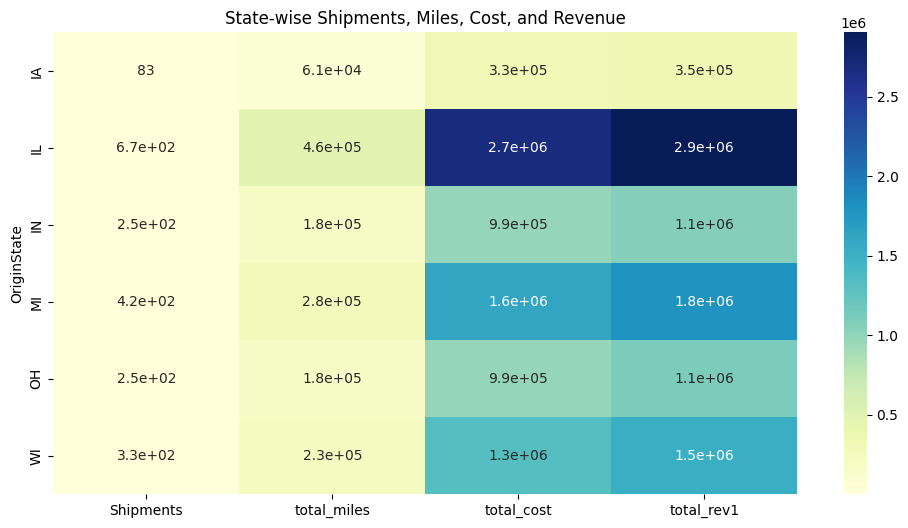

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(state_summary, annot=True, cmap="YlGnBu")
plt.title("State-wise Shipments, Miles, Cost, and Revenue")
plt.show()

In [33]:
cities = City_summary["OriginCity"].unique()

geolocator = Nominatim(user_agent="dispatch_mapper")

coords = {}
for city in cities:
    try:
        location = geolocator.geocode(city + ", India")  # adding country for accuracy
        if location:
            coords[city] = (location.latitude, location.longitude)
        time.sleep(1)  # avoid hitting API rate limits
    except:
        coords[city] = (None, None)

# Adding lat/long to DataFrame
City_summary["Latitude"] = City_summary["OriginCity"].map(lambda x: coords[x][0])
City_summary["Longitude"] = City_summary["OriginCity"].map(lambda x: coords[x][1])

In [34]:
import plotly.express as px

fig = px.scatter_mapbox(
    City_summary,
    lat="Latitude",
    lon="Longitude",
    size="Shipments",       # bubble size by shipment volume
    color="total_cost",     # bubble color by cost
    hover_name="OriginCity",
    hover_data=["Shipments", "total_cost", "total_rev"],
    zoom=4,
    height=600
)

fig.update_layout(mapbox_style="carto-positron", title="Dispatch Density Map")
fig.show()

In [35]:
X = City_summary[["Shipments", "total_miles", "total_cost", "total_rev"]]

In [36]:
# Scaling values so large numbers (like revenue) don’t dominate
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

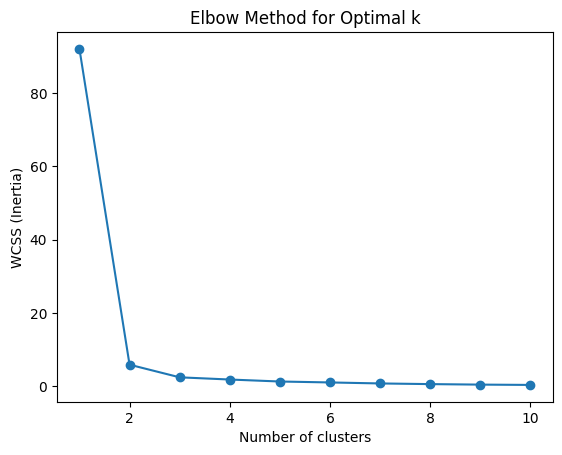

In [37]:
# Elbow Method 
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [38]:
from sklearn.cluster import MiniBatchKMeans
optimal_k = 2  
kmeans = KMeans(n_clusters=optimal_k, random_state=42 ,n_init=10)
City_summary["Cluster"] = kmeans.fit_predict(X_scaled)

In [39]:
# Identifying Warehouse Hubs 
centers = kmeans.cluster_centers_
distances = np.linalg.norm(X_scaled - centers[City_summary["Cluster"]], axis=1)
City_summary["DistanceToCenter"] = distances

In [40]:
#Suggested hubs = closest city to each cluster center
hubs = City_summary.loc[City_summary.groupby("Cluster")["DistanceToCenter"].idxmin()]
print("Suggested Warehouse Hubs:")
print(hubs[["OriginCity", "Cluster", "Shipments", "total_cost"]])

Suggested Warehouse Hubs:
   OriginCity  Cluster  Shipments  total_cost
21      Vizag        0         83      327411
9      Jaipur        1        166      680913


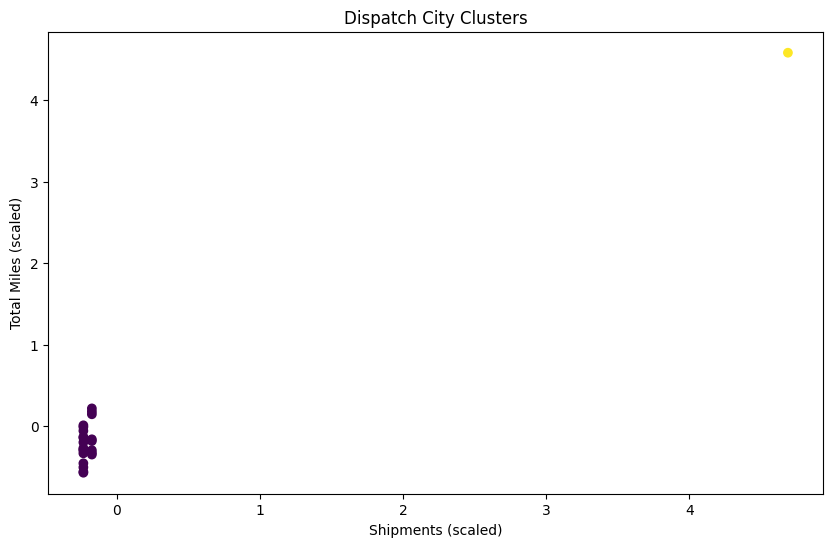

In [41]:
# Visualizing Clusters 
plt.figure(figsize=(10,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=City_summary["Cluster"], cmap="viridis")
plt.xlabel("Shipments (scaled)")
plt.ylabel("Total Miles (scaled)")
plt.title("Dispatch City Clusters")
plt.show()

In [42]:
df.columns

Index(['TripID', 'ShipperID', 'CategoryID', 'Customer', 'ShipDate',
       'OriginCity', 'OriginState', 'ShipDays', 'DestinationCity ',
       'DestinationState', 'DeliveryDate', 'Total Miles', 'Shipping Cost',
       'Revenue'],
      dtype='object')

In [43]:
dist_destination_city = df["DestinationCity "].unique()
dist_destination_city
tripID_Unique= df["TripID"]

In [44]:
City_summary["destination_city"] = dist_destination_city
City_summary["trip_id"]= tripID_Unique
City_summary

,OriginCity,Shipments,total_miles,total_cost,total_rev,Latitude,Longitude,Cluster,DistanceToCenter,destination_city,trip_id
0,Ahmedabad,83,53417,355599,396535,23.021537,72.580057,0,0.641946,Vijaywada,10001
1,Bangalore,84,56237,280563,344083,12.976794,77.590082,0,0.708026,Bhatinda,10002
2,Bhatinda,84,56916,291353,350180,30.206791,74.946370,0,0.542692,Jaipur,10003
3,Bhubaneswar,83,56862,327284,340270,20.260296,85.839452,0,0.309436,Guwahati,10004
4,Chennai,83,59929,325431,389288,13.083694,80.270186,0,0.359733,Raipur,10005
5,Daman,84,58611,324608,343544,20.416970,72.833173,0,0.268615,Bhubaneswar,10006
6,Guwahati,83,60517,317845,338069,26.180598,91.753943,0,0.409455,Patna,10007
7,Hyderabad,84,63414,341289,365135,17.360589,78.474061,0,0.452499,Kolkata,10008
8,Indore,83,58991,332829,371881,22.720362,75.868200,0,0.134733,Mohali,10009
9,Jaipur,166,118682,680913,739000,26.915458,75.818982,1,0.000000,Zirakpur,10010


In [45]:
#Calculating cost per mile and Cost per Shipment
City_summary["CostPerMile"]= City_summary["total_cost"]/City_summary["total_miles"]

In [46]:
lane_efficiency= City_summary.groupby(["OriginCity","destination_city"]).agg(
                avg_cost_per_mile=("CostPerMile","mean"),
                total_shipment=("trip_id","count")

).reset_index().sort_values("avg_cost_per_mile")

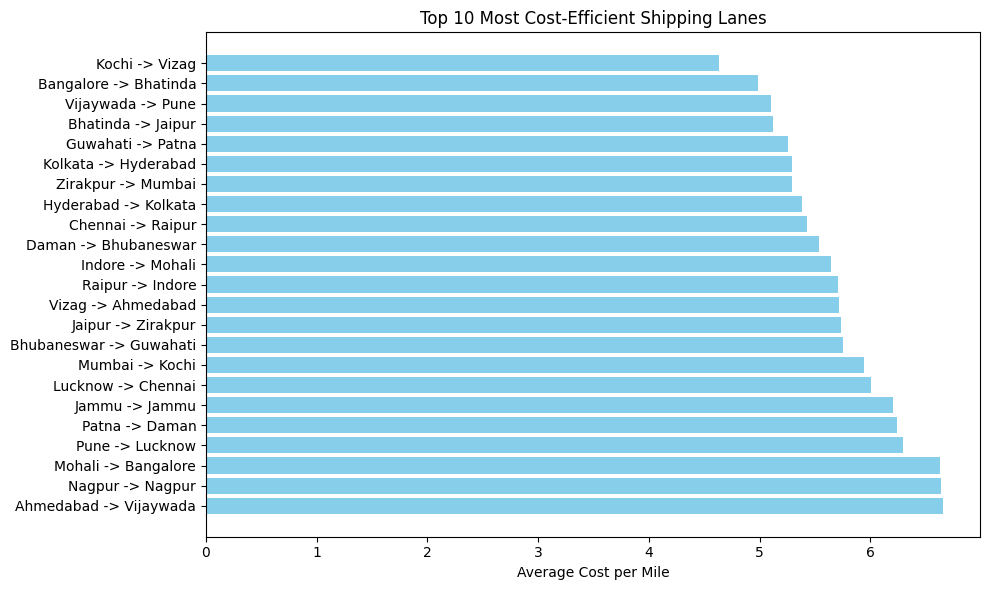

In [47]:
lane_efficiency["lane"]= lane_efficiency["OriginCity"]+" -> "+lane_efficiency["destination_city"]
top_lanes= lane_efficiency
plt.figure(figsize=(10, 6))
plt.barh(top_lanes["lane"], top_lanes["avg_cost_per_mile"], color="skyblue")
plt.xlabel("Average Cost per Mile")
plt.title("Top 10 Most Cost-Efficient Shipping Lanes")
plt.gca().invert_yaxis()  # Highest efficiency at the top
plt.tight_layout()
plt.show()

In [48]:
lane_efficiency

,OriginCity,destination_city,avg_cost_per_mile,total_shipment,lane
11,Kochi,Vizag,4.629514,1,Kochi -> Vizag
1,Bangalore,Bhatinda,4.988940,1,Bangalore -> Bhatinda
20,Vijaywada,Pune,5.101847,1,Vijaywada -> Pune
2,Bhatinda,Jaipur,5.119000,1,Bhatinda -> Jaipur
6,Guwahati,Patna,5.252161,1,Guwahati -> Patna
12,Kolkata,Hyderabad,5.292019,1,Kolkata -> Hyderabad
22,Zirakpur,Mumbai,5.295494,1,Zirakpur -> Mumbai
7,Hyderabad,Kolkata,5.381919,1,Hyderabad -> Kolkata
4,Chennai,Raipur,5.430276,1,Chennai -> Raipur
5,Daman,Bhubaneswar,5.538346,1,Daman -> Bhubaneswar


In [49]:
# Checking lane length vs cost per mile

lane_analysis = City_summary.groupby(["OriginCity","destination_city"]).agg(
    avg_cost=("total_cost","mean"),
    avg_miles=("total_miles","mean"),
    avg_cost_per_mile=("CostPerMile","mean"),
    shipments=("trip_id","count")
).reset_index().sort_values("avg_cost")

In [50]:
lane_analysis

,OriginCity,destination_city,avg_cost,avg_miles,avg_cost_per_mile,shipments
1,Bangalore,Bhatinda,280563.0,56237.0,4.988940,1
20,Vijaywada,Pune,287887.0,56428.0,5.101847,1
11,Kochi,Vizag,289340.0,62499.0,4.629514,1
22,Zirakpur,Mumbai,290622.0,54881.0,5.295494,1
2,Bhatinda,Jaipur,291353.0,56916.0,5.119000,1
12,Kolkata,Hyderabad,308747.0,58342.0,5.292019,1
6,Guwahati,Patna,317845.0,60517.0,5.252161,1
5,Daman,Bhubaneswar,324608.0,58611.0,5.538346,1
4,Chennai,Raipur,325431.0,59929.0,5.430276,1
3,Bhubaneswar,Guwahati,327284.0,56862.0,5.755760,1


In [51]:
City_summary.groupby(["OriginCity","destination_city"]).size()

OriginCity   destination_city
Ahmedabad    Vijaywada           1
Bangalore    Bhatinda            1
Bhatinda     Jaipur              1
Bhubaneswar  Guwahati            1
Chennai      Raipur              1
Daman        Bhubaneswar         1
Guwahati     Patna               1
Hyderabad    Kolkata             1
Indore       Mohali              1
Jaipur       Zirakpur            1
Jammu        Jammu               1
Kochi        Vizag               1
Kolkata      Hyderabad           1
Lucknow      Chennai             1
Mohali       Bangalore           1
Mumbai       Kochi               1
Nagpur       Nagpur              1
Patna        Daman               1
Pune         Lucknow             1
Raipur       Indore              1
Vijaywada    Pune                1
Vizag        Ahmedabad           1
Zirakpur     Mumbai              1
dtype: int64

In [52]:
City_summary

,OriginCity,Shipments,total_miles,total_cost,total_rev,Latitude,Longitude,Cluster,DistanceToCenter,destination_city,trip_id,CostPerMile
0,Ahmedabad,83,53417,355599,396535,23.021537,72.580057,0,0.641946,Vijaywada,10001,6.657038
1,Bangalore,84,56237,280563,344083,12.976794,77.590082,0,0.708026,Bhatinda,10002,4.988940
2,Bhatinda,84,56916,291353,350180,30.206791,74.946370,0,0.542692,Jaipur,10003,5.119000
3,Bhubaneswar,83,56862,327284,340270,20.260296,85.839452,0,0.309436,Guwahati,10004,5.755760
4,Chennai,83,59929,325431,389288,13.083694,80.270186,0,0.359733,Raipur,10005,5.430276
5,Daman,84,58611,324608,343544,20.416970,72.833173,0,0.268615,Bhubaneswar,10006,5.538346
6,Guwahati,83,60517,317845,338069,26.180598,91.753943,0,0.409455,Patna,10007,5.252161
7,Hyderabad,84,63414,341289,365135,17.360589,78.474061,0,0.452499,Kolkata,10008,5.381919
8,Indore,83,58991,332829,371881,22.720362,75.868200,0,0.134733,Mohali,10009,5.642030
9,Jaipur,166,118682,680913,739000,26.915458,75.818982,1,0.000000,Zirakpur,10010,5.737290


In [61]:
# Step 1: Creating a mapping from OriginCity to DestinationState
city_to_state = df.set_index("OriginCity")["DestinationState"].to_dict()

# Step 2: Mapping this to City_summary
City_summary["DestinationState"] = City_summary["OriginCity"].map(city_to_state)

In [62]:
City_summary

,OriginCity,Shipments,total_miles,total_cost,total_rev,Latitude,Longitude,Cluster,DistanceToCenter,destination_city,trip_id,CostPerMile,Trip_level_shipments,DestinationState
0,Ahmedabad,83,53417,355599,396535,23.021537,72.580057,0,0.641946,Vijaywada,10001,6.657038,1,IA
1,Bangalore,84,56237,280563,344083,12.976794,77.590082,0,0.708026,Bhatinda,10002,4.988940,1,OH
2,Bhatinda,84,56916,291353,350180,30.206791,74.946370,0,0.542692,Jaipur,10003,5.119000,1,IL
3,Bhubaneswar,83,56862,327284,340270,20.260296,85.839452,0,0.309436,Guwahati,10004,5.755760,1,IN
4,Chennai,83,59929,325431,389288,13.083694,80.270186,0,0.359733,Raipur,10005,5.430276,1,IL
5,Daman,84,58611,324608,343544,20.416970,72.833173,0,0.268615,Bhubaneswar,10006,5.538346,1,IN
6,Guwahati,83,60517,317845,338069,26.180598,91.753943,0,0.409455,Patna,10007,5.252161,1,WI
7,Hyderabad,84,63414,341289,365135,17.360589,78.474061,0,0.452499,Kolkata,10008,5.381919,1,IL
8,Indore,83,58991,332829,371881,22.720362,75.868200,0,0.134733,Mohali,10009,5.642030,1,IN
9,Jaipur,166,118682,680913,739000,26.915458,75.818982,1,0.000000,Zirakpur,10010,5.737290,1,WI


In [64]:
City_summary["OriginCity"].unique()

array(['Ahmedabad', 'Bangalore', 'Bhatinda', 'Bhubaneswar', 'Chennai',
       'Daman', 'Guwahati', 'Hyderabad', 'Indore', 'Jaipur', 'Jammu',
       'Kochi', 'Kolkata', 'Lucknow', 'Mohali', 'Mumbai', 'Nagpur',
       'Patna', 'Pune', 'Raipur', 'Vijaywada', 'Vizag', 'Zirakpur'],
      dtype=object)

In [65]:
City_summary.to_csv(r"C:\Users\coolt\Downloads\XYZ_Logistics_TripLevel.csv", index=False)